In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compuestos tóxicos en ecosistemas acuáticos

El transporte, destino y el impacto de algunos compuestos tóxicos en el ecosistema (acuático) está íntimamente relacionado con la forma en que se dividen o se asocian con la materia sólida presente en el interior o en los sedimentos de un cuerpo de agua.

El análisis de sustancias tóxicas debe distinguir entre formas disueltas y en partículadas. Esta distinción tiene un impacto en el transporte y el destino del contaminante en el sentido de que ciertos mecanismos (por ejemplo, la sedimentación o volatilización) pueden impactar de manera diferente las dos formas (antes mencionadas). 

Por ejemplo, la volatilización actúa sólo sobre el componente disuelto de un contaminante. 

# Partición sólido-líquido

Algunas sustancias tóxicas se encuentran en forma disuelta y particulada, tal como se mencionó en líneas anteriores.

Matemáticamente la concentración de un contaminante separado en dos componentes (disuelto y partículado) se puede representar como:

$
c = c_d + c_p
$

$
c_d = F_d * c
$

$
c_p = F_p * c
$

Donde, $c$, $c_d$, $c_p$, $F_d$ y $F_p$ representan la concentración del contaminante, la concentración disuelta del contaminante, la concentración particulada del contaminante, fracción disuelta del contaminante y la fracción particulada del contaminante. 

$F_d$ y $F_p$ son una función de los coeficientes de partición del contaminante y de la concentración de sólidos suspendidos de este.

$
F_d =\frac{1}{1+K_d*m}
$

$
F_p =\frac{K_d * m}{1 + K_d * m}
$

$
F_d + F_p  = 1
$

Donde $K_d$ ($\frac{m^3}{g}$) y $m$ ($\frac{g}{m^3}$) son el coeficiente de partición y la concentración de sólidos suspendidos.

*Supongamos que el producto de $K_d*m$ oscila entre 0.0001 y 1000 (adimensional), entonces*

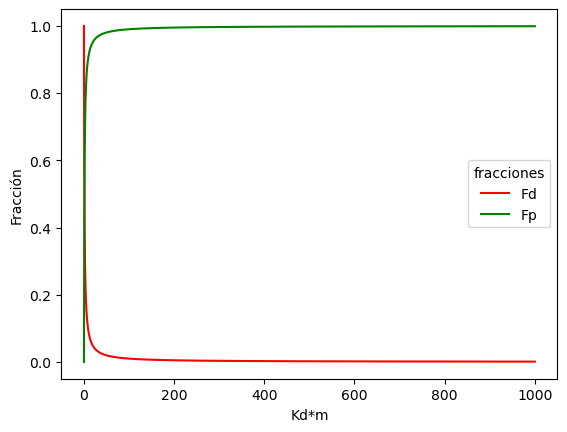

In [2]:
Kdm_1 = np.linspace(0.0001, 1000, 100000)
plt.plot(Kdm_1, 1/(1+Kdm_1), c="red", label="Fd")
plt.plot(Kdm_1, Kdm_1/(1+Kdm_1), c="green", label="Fp")
plt.xlabel("Kd*m")
plt.ylabel("Fracción")
plt.legend(title="fracciones")

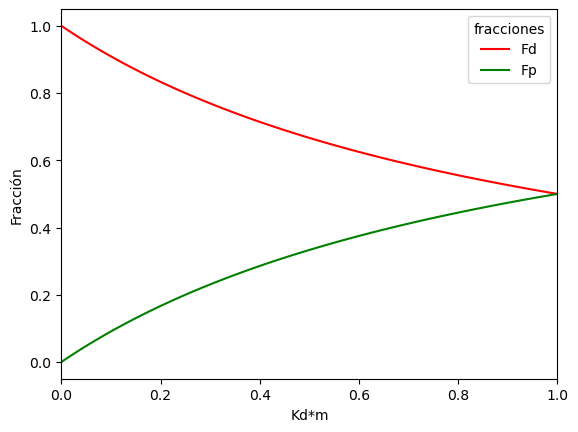

In [3]:
Kdm_1 = np.linspace(0.0001, 1000, 100000)
plt.plot(Kdm_1, 1/(1+Kdm_1), c="red", label="Fd")
plt.plot(Kdm_1, Kdm_1/(1+Kdm_1), c="green", label="Fp")
plt.xlim((0,1))
plt.xlabel("Kd*m")
plt.ylabel("Fracción")
plt.legend(title="fracciones")

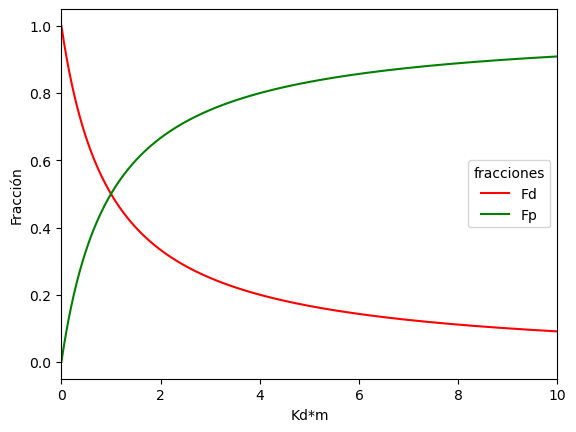

In [4]:
Kdm_1 = np.linspace(0.0001, 1000, 100000)
plt.plot(Kdm_1, 1/(1+Kdm_1), c="red", label="Fd")
plt.plot(Kdm_1, Kdm_1/(1+Kdm_1), c="green", label="Fp")
plt.xlim((0,10))
plt.xlabel("Kd*m")
plt.ylabel("Fracción")
plt.legend(title="fracciones")

*Si el producto $K_d*m$ incremeta, también lo hará la fracción del contaminante asociado a la materia sólida.*

Así, si un contaminante presenta una **baja capacidad de sorción** y una **baja concentración de sólidos suspendidos** en el contaminante predominará la fracción disuelta.

# Balance de masa de un contaminante

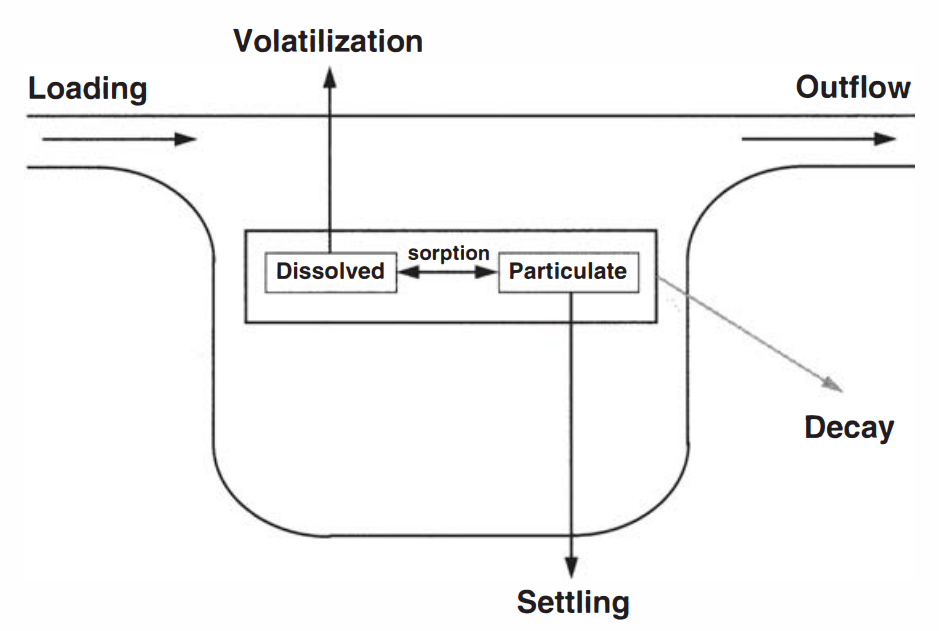

$
v \frac{dc}{dt} = Q*c_i - Q*C - k*v*c -\vec{v_v}*A*F_d*c -\vec{v_s}*A*F_p*c
$

En estado estacionario

$
0= Q*c_i - Q*c - k*v*c -\vec{v_v}*A*F_d*c -\vec{v_s}*A*F_p*c
$

$
c = \frac{Q*c_i}{Q + k*v + \vec{v_v}*A*F_d + \vec{v_s}*A*F_p}
$

Donde, $v$, $c$, $c_i$, $\vec{v_v}$, $\vec{v_s}$, $A$ y $k$ representan el volumen del sistema acuático, la concentración a la salida, la concentración de entrada, la velocidad de volatilización, la velocidad de sedimentación, el área del sistema acuático, y la constante cinética de reacción (en el caso de que el contaminante no sea conservativo).

El parámetro $c$ de la última ecuación lo podemos representar como un **coeficiente de transferencia** ($\beta$), quedando:

$
\beta = \frac{Q*c_i}{Q + k*v + \vec{v_v}*A*F_d + \vec{v_s}*A*F_p}
$

Para determinar que tanto contaminante se transporta a los sedimentos, el balance anterior lo podemos simplificar de la siguiente manera:

$
v\frac{dm}{dt} = Q*m_i - Q*m - \vec{v_s}*A*m
$

En estado estacionario:

$
0 = Q*m_i - Q*m - \vec{v_s}*A*m
$

$
m = \frac{Q*m_i}{Q+ \vec{v_s}*A}
$

$
\beta = \frac{Q}{Q+\vec{v_s}*A}
$

$
    \vec{v_s}=\frac{Q*m_i - Q*m}{A*m}
$

# Ejemplo

Un lago cuyo volumen, área superficial y profundidad son de $3515*10^9 m^3$, $59570*10^6 m^2$ y $59m$, presenta una carga de sólidos suspendidos de $6.15*10^{12} \frac{g}{año}$ ($0.531 \frac{g}{m^3}$). El lago se alimenta de 3 flujos correspondientes a ríos aledaños. La suma de esos tres flujos representa el flujo de salida de agua del lago, el cual es de $161*10^9 \frac{m^3}{año}$.

Parte de la carga de sólidos suspendidos, presenta una carga de un contaminante conocido como **PCB** (el cual el liposoluble y bomagnificable en los organismos acuáticos y en las personas) de $5.37*10^{12}\frac{\mu g}{año}$.

Con base en esta información, estime la variación de la fracción particulada y disuelta del contaminante y la cantidad de masa que se volatiliza y sedimenta. Asuma que la velocidad de volatilización del contaminante es de $178.45\frac{m}{año}$ y que este no es reactivo. **Nota:** considere un rango de coeficientes de partición ($k_d$) entre 0.009 y 0.0301 $\frac{m^3}{g}$

### Respuesta

a partir de la expresión:

$
    \vec{v_s}=\frac{Q*m_i - Q*m}{A*m}
$

Vamos a estimar la velocidad de sedimentación.

Como no conocemos los caudales de ingreso.

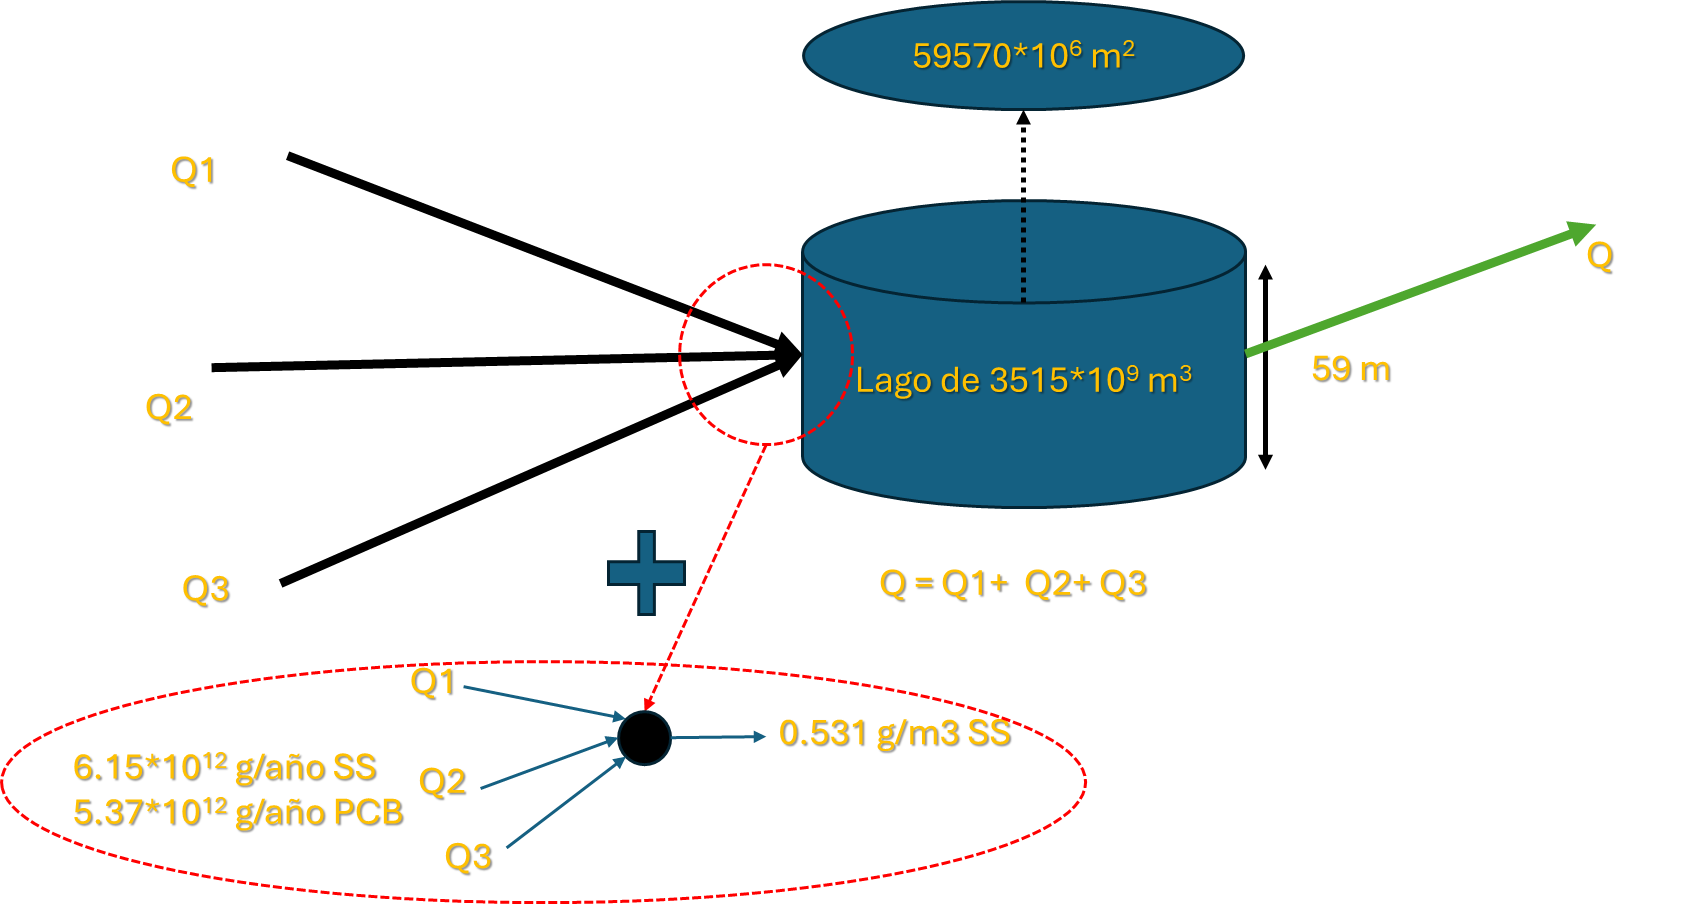

Vamos asumir que $Q1*m1 + Q2*m2 + Q3*m3 = Q*m$. Entonces $Qi*mi = 6.15*10^{12} \frac{g}{año}SS$

In [5]:
Qimi = 6.15*10**(12)
Qimi

6150000000000.0

Entonces $\vec{v_s}$ será de:

In [6]:
m= 0.531
Q = 161*10**9
A= 59570*10**6
vs = (Qimi-Q*m)/(A*m)
vs #m/año

191.72269437560522

Para estimar la concentración del contaminante, recordemos está expresión de flujo másico vista anteriormente en el curso de Balance de Materia y Energía: $Q*C = \dot m$. Si $\dot m$ representa la carga del contaminante, entonces:

$
c_{PCB} = \frac{\dot m_{PCB}}{Q}= \frac{5.37*10^{12}\frac{\mu g}{año}}{161*10^{9}\frac{m^3}{año}}
$

In [7]:
c_PCB = (5.37*10**12)/(161*10**9)
c_PCB #microgramo/m3

33.35403726708075

Con las expresiones:

$
F_d =\frac{1}{1+K_d*m}
$

$
F_p =\frac{K_d * m}{1 + K_d * m}
$

Estimaremos las fracciones disuelta y partículada de los sólidos

In [8]:
Kd = np.linspace(0.009, 0.0301, 1000) #m3/g
Fd = 1/(1+Kd*m)
Fp = (Kd*m)/(1+Kd*m)

In [9]:
Kd

array([0.009     , 0.00902112, 0.00904224, 0.00906336, 0.00908448,
       0.00910561, 0.00912673, 0.00914785, 0.00916897, 0.00919009,
       0.00921121, 0.00923233, 0.00925345, 0.00927457, 0.0092957 ,
       0.00931682, 0.00933794, 0.00935906, 0.00938018, 0.0094013 ,
       0.00942242, 0.00944354, 0.00946466, 0.00948579, 0.00950691,
       0.00952803, 0.00954915, 0.00957027, 0.00959139, 0.00961251,
       0.00963363, 0.00965475, 0.00967588, 0.009697  , 0.00971812,
       0.00973924, 0.00976036, 0.00978148, 0.0098026 , 0.00982372,
       0.00984484, 0.00986597, 0.00988709, 0.00990821, 0.00992933,
       0.00995045, 0.00997157, 0.00999269, 0.01001381, 0.01003493,
       0.01005606, 0.01007718, 0.0100983 , 0.01011942, 0.01014054,
       0.01016166, 0.01018278, 0.0102039 , 0.01022503, 0.01024615,
       0.01026727, 0.01028839, 0.01030951, 0.01033063, 0.01035175,
       0.01037287, 0.01039399, 0.01041512, 0.01043624, 0.01045736,
       0.01047848, 0.0104996 , 0.01052072, 0.01054184, 0.01056

In [10]:
Fd

array([0.99524373, 0.99523262, 0.99522151, 0.9952104 , 0.9951993 ,
       0.99518819, 0.99517708, 0.99516597, 0.99515487, 0.99514376,
       0.99513265, 0.99512155, 0.99511044, 0.99509934, 0.99508823,
       0.99507712, 0.99506602, 0.99505492, 0.99504381, 0.99503271,
       0.9950216 , 0.9950105 , 0.99499939, 0.99498829, 0.99497719,
       0.99496609, 0.99495498, 0.99494388, 0.99493278, 0.99492168,
       0.99491058, 0.99489947, 0.99488837, 0.99487727, 0.99486617,
       0.99485507, 0.99484397, 0.99483287, 0.99482177, 0.99481067,
       0.99479957, 0.99478847, 0.99477738, 0.99476628, 0.99475518,
       0.99474408, 0.99473298, 0.99472189, 0.99471079, 0.99469969,
       0.9946886 , 0.9946775 , 0.9946664 , 0.99465531, 0.99464421,
       0.99463312, 0.99462202, 0.99461093, 0.99459983, 0.99458874,
       0.99457764, 0.99456655, 0.99455546, 0.99454436, 0.99453327,
       0.99452218, 0.99451108, 0.99449999, 0.9944889 , 0.99447781,
       0.99446672, 0.99445562, 0.99444453, 0.99443344, 0.99442

In [11]:
Fp

array([0.00475627, 0.00476738, 0.00477849, 0.0047896 , 0.0048007 ,
       0.00481181, 0.00482292, 0.00483403, 0.00484513, 0.00485624,
       0.00486735, 0.00487845, 0.00488956, 0.00490066, 0.00491177,
       0.00492288, 0.00493398, 0.00494508, 0.00495619, 0.00496729,
       0.0049784 , 0.0049895 , 0.00500061, 0.00501171, 0.00502281,
       0.00503391, 0.00504502, 0.00505612, 0.00506722, 0.00507832,
       0.00508942, 0.00510053, 0.00511163, 0.00512273, 0.00513383,
       0.00514493, 0.00515603, 0.00516713, 0.00517823, 0.00518933,
       0.00520043, 0.00521153, 0.00522262, 0.00523372, 0.00524482,
       0.00525592, 0.00526702, 0.00527811, 0.00528921, 0.00530031,
       0.0053114 , 0.0053225 , 0.0053336 , 0.00534469, 0.00535579,
       0.00536688, 0.00537798, 0.00538907, 0.00540017, 0.00541126,
       0.00542236, 0.00543345, 0.00544454, 0.00545564, 0.00546673,
       0.00547782, 0.00548892, 0.00550001, 0.0055111 , 0.00552219,
       0.00553328, 0.00554438, 0.00555547, 0.00556656, 0.00557

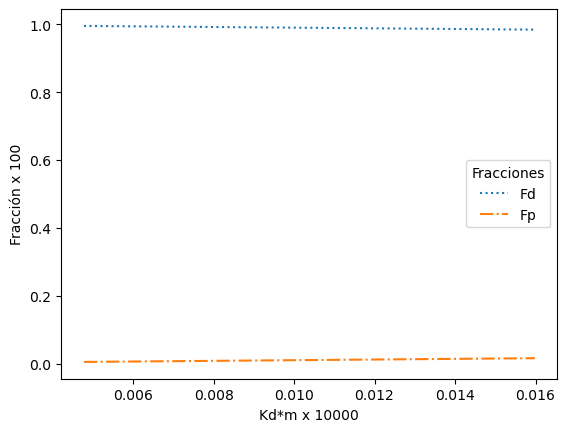

In [12]:
plt.plot(Kd*m,Fd, linestyle="dotted", label="Fd")
plt.plot(Kd*m,Fp, linestyle="dashdot", label="Fp")
plt.legend(title="Fracciones")
plt.xlabel("Kd*m x 10000")
plt.ylabel("Fracción x 100")
#plt.xlim((0.009, 0.0301))
plt.show()

Al no variar la concentración de sólidos, las fracciones disuelta y particulada presentan un cambio mínimo respecto al cambio en el coeficiente de partición.

Ahora estimemos el coeficiente de transferencia $\beta$

$
\beta = \frac{Q}{Q + k*v + \vec{v_v}*A*F_d + \vec{v_s}*A*F_p}
$

In [13]:
kXvol = 0
Vv = 178.45
VvXAXFd = Vv*A*Fd #Volumen volatilizado m3/año
VsxAxFp = vs*A*Fp  #Volumen sedimentado m3/año

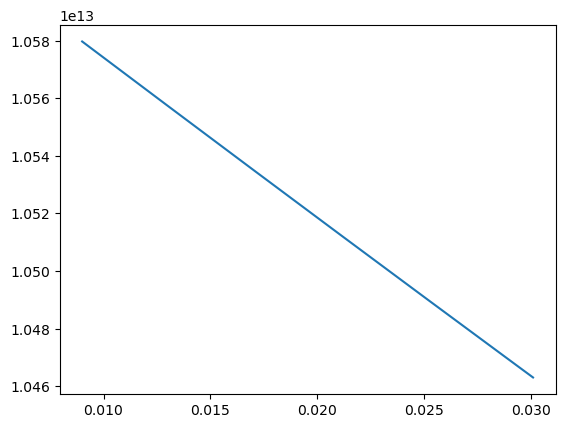

In [14]:
plt.plot(Kd,VvXAXFd)

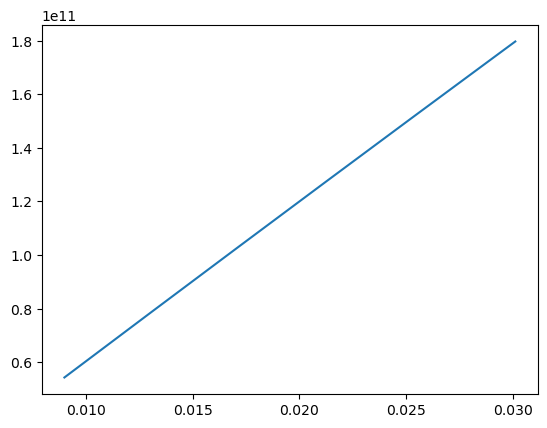

In [15]:
plt.plot(Kd,VsxAxFp)

In [16]:
beta = Q/(Q+VvXAXFd+VsxAxFp)
beta

array([0.01491427, 0.01491426, 0.01491425, 0.01491424, 0.01491423,
       0.01491421, 0.0149142 , 0.01491419, 0.01491418, 0.01491417,
       0.01491415, 0.01491414, 0.01491413, 0.01491412, 0.0149141 ,
       0.01491409, 0.01491408, 0.01491407, 0.01491406, 0.01491404,
       0.01491403, 0.01491402, 0.01491401, 0.014914  , 0.01491398,
       0.01491397, 0.01491396, 0.01491395, 0.01491394, 0.01491392,
       0.01491391, 0.0149139 , 0.01491389, 0.01491387, 0.01491386,
       0.01491385, 0.01491384, 0.01491383, 0.01491381, 0.0149138 ,
       0.01491379, 0.01491378, 0.01491377, 0.01491375, 0.01491374,
       0.01491373, 0.01491372, 0.0149137 , 0.01491369, 0.01491368,
       0.01491367, 0.01491366, 0.01491364, 0.01491363, 0.01491362,
       0.01491361, 0.0149136 , 0.01491358, 0.01491357, 0.01491356,
       0.01491355, 0.01491354, 0.01491352, 0.01491351, 0.0149135 ,
       0.01491349, 0.01491347, 0.01491346, 0.01491345, 0.01491344,
       0.01491343, 0.01491341, 0.0149134 , 0.01491339, 0.01491

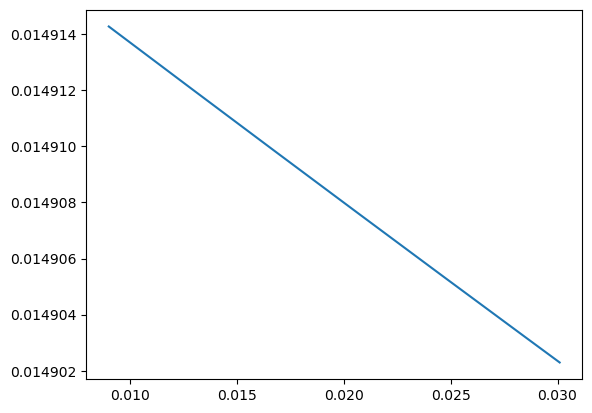

In [17]:
plt.plot(Kd,beta)

Si $\beta=\frac{c}{c_i}$, entoces la concentración de salida será del contaminante:

In [18]:
c = beta* c_PCB
c #Concentración de PCB que sale del lago

array([0.49745128, 0.49745087, 0.49745047, 0.49745006, 0.49744966,
       0.49744925, 0.49744885, 0.49744844, 0.49744804, 0.49744763,
       0.49744723, 0.49744683, 0.49744642, 0.49744602, 0.49744561,
       0.49744521, 0.4974448 , 0.4974444 , 0.49744399, 0.49744359,
       0.49744318, 0.49744278, 0.49744237, 0.49744197, 0.49744157,
       0.49744116, 0.49744076, 0.49744035, 0.49743995, 0.49743954,
       0.49743914, 0.49743873, 0.49743833, 0.49743793, 0.49743752,
       0.49743712, 0.49743671, 0.49743631, 0.4974359 , 0.4974355 ,
       0.49743509, 0.49743469, 0.49743429, 0.49743388, 0.49743348,
       0.49743307, 0.49743267, 0.49743226, 0.49743186, 0.49743146,
       0.49743105, 0.49743065, 0.49743024, 0.49742984, 0.49742943,
       0.49742903, 0.49742863, 0.49742822, 0.49742782, 0.49742741,
       0.49742701, 0.49742661, 0.4974262 , 0.4974258 , 0.49742539,
       0.49742499, 0.49742458, 0.49742418, 0.49742378, 0.49742337,
       0.49742297, 0.49742256, 0.49742216, 0.49742176, 0.49742

In [19]:
c*Q #Flujo másico de PCB que sale del lago microgramo/m3

array([8.00896556e+10, 8.00895904e+10, 8.00895253e+10, 8.00894601e+10,
       8.00893950e+10, 8.00893298e+10, 8.00892647e+10, 8.00891995e+10,
       8.00891343e+10, 8.00890692e+10, 8.00890040e+10, 8.00889389e+10,
       8.00888738e+10, 8.00888086e+10, 8.00887435e+10, 8.00886783e+10,
       8.00886132e+10, 8.00885480e+10, 8.00884829e+10, 8.00884178e+10,
       8.00883526e+10, 8.00882875e+10, 8.00882224e+10, 8.00881572e+10,
       8.00880921e+10, 8.00880270e+10, 8.00879619e+10, 8.00878967e+10,
       8.00878316e+10, 8.00877665e+10, 8.00877014e+10, 8.00876363e+10,
       8.00875712e+10, 8.00875060e+10, 8.00874409e+10, 8.00873758e+10,
       8.00873107e+10, 8.00872456e+10, 8.00871805e+10, 8.00871154e+10,
       8.00870503e+10, 8.00869852e+10, 8.00869201e+10, 8.00868550e+10,
       8.00867899e+10, 8.00867248e+10, 8.00866597e+10, 8.00865946e+10,
       8.00865295e+10, 8.00864644e+10, 8.00863993e+10, 8.00863343e+10,
       8.00862692e+10, 8.00862041e+10, 8.00861390e+10, 8.00860739e+10,
      

Ahora estimemos la masa que se sedimento y la masa que se volatilizo. Tenga en cuenta la diferencia entre $Qi*mi-Q*m$